In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [65]:
df=pd.read_csv("C:/Users/pujit/OneDrive/Desktop/Retail-Sales-Analysis/data/Sample - Superstore.csv",encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [67]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [68]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [69]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Convert Date Column

In [72]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [73]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [74]:
df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
df['Month Name']=df['Order Date'].dt.month_name()

In [75]:
df[['Order Date','Year','Month','Month Name']].head()

,Order Date,Year,Month,Month Name
0,2016-11-08,2016,11,November
1,2016-11-08,2016,11,November
2,2016-06-12,2016,6,June
3,2015-10-11,2015,10,October
4,2015-10-11,2015,10,October


#### Key Analyses

In [76]:
total_sales=df['Sales'].sum()
print("Total Sales:",total_sales)

Total Sales: 2297200.8603


#### Sales by Category

In [77]:
sales_category=df.groupby('Category')['Sales'].sum().sort_values()
sales_category

Category
Office Supplies    719047.0320
Furniture          741999.7953
Technology         836154.0330
Name: Sales, dtype: float64

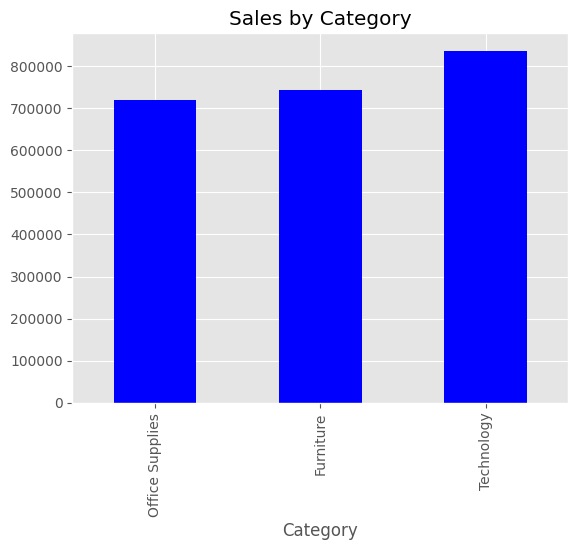

In [78]:
sales_category.plot(kind='bar',color='blue')
plt.title("Sales by Category")
plt.show()

#### Sales by Region

In [79]:
sales_region=df.groupby('Region')['Sales'].sum()
sales_region

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

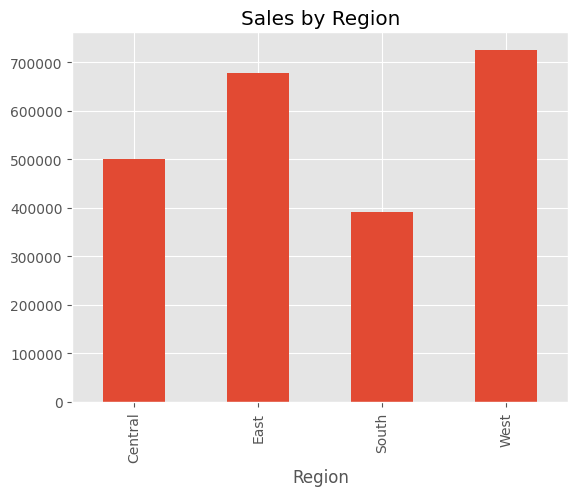

In [80]:
sales_region.plot(kind='bar')
plt.title("Sales by Region")
plt.show()

#### Monthly Sales Trend

In [81]:
month_sales=df.groupby(['Year','Month'])['Sales'].sum().reset_index()
month_sales


,Year,Month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


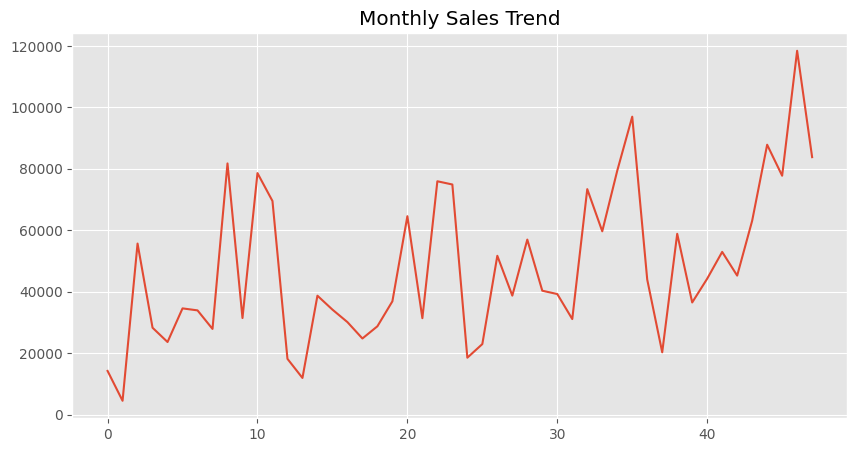

In [82]:
plt.figure(figsize=(10,5))
plt.plot(month_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.show()

#### Top 10 Products

In [83]:
top_products=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

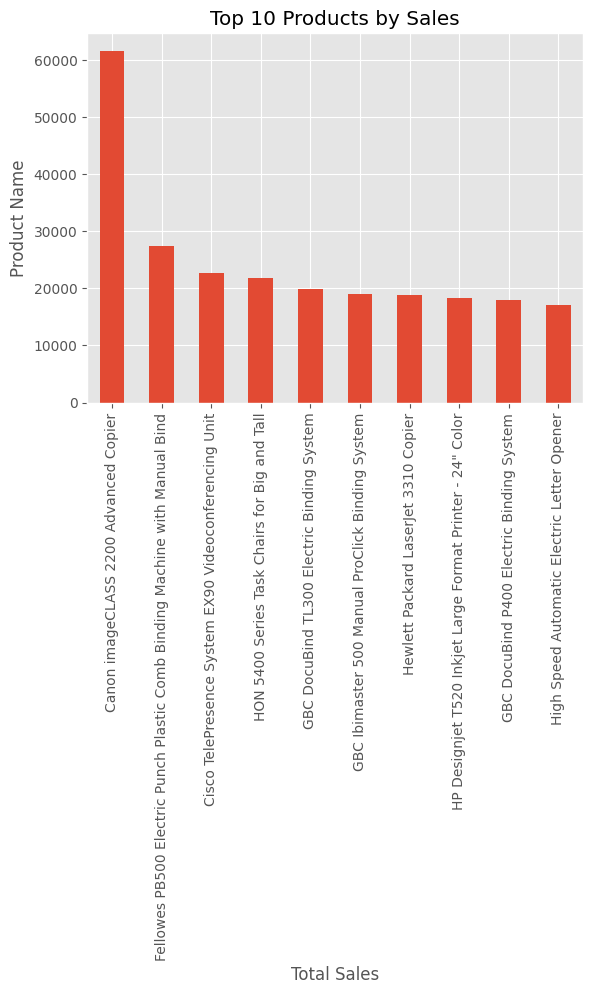

In [84]:
top_products.plot(kind='bar')
plt.title("Top 10 Products by Sales")
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

## Key Business Insights

1. The Technology category generated the highest overall revenue, 
   indicating strong demand for tech-related products.

2. The West region contributed the most to total sales, 
   making it the strongest performing region.

3. Sales show a noticeable increase toward the end of the year, 
   especially in Q4, suggesting seasonal buying patterns.

4. A small number of products contribute a large share of revenue, 
   indicating a Pareto-like distribution.

5. Some categories have high sales but lower profit margins, 
   suggesting potential pricing or cost issues.

In [85]:
df.to_csv(r"C:\Users\pujit\OneDrive\Desktop\Retail-Sales-Analysis\data\cleaned_retail_data.csv", index=False)